# Simple Linear Regression

## What is Simple Lineaer Regression?

Simple Linear Regression (SLR) is a statistical method used to examine and model the relationship between **two continuous variables**:
- **Independent variable (X)** – also called the predictor or explanatory variable  
- **Dependent variable (Y)** – also called the outcome or response variable  

SLR helps us understand how changes in the independent variable affect the dependent variable by fitting a **straight line** through the data points.

This straight line, known as the **regression line**, allows us to:
- **Describe** the direction and strength of the relationship  
- **Predict** the value of the dependent variable from a given value of the independent variable  
- **Evaluate** how well one variable explains or influences the other  

In simple terms, SLR answers the question: **“If X changes, how does Y respond?”**

The equation goes: **y = mx + c**
y = response variable, dependent variable

x = predictor variable, independent variable

m = slope or coefficient.

c = intercept

## Education Domain 
### Predicting learners scores

In [1]:
# Importing required libraries

import pandas as pd          # For data loading, cleaning, and manipulation
import matplotlib.pyplot as plt  # For creating plots and visualizations
from scipy.stats import pearsonr as pr  # For calculating Pearson correlation coefficient
import numpy as np           # For numerical operations and arrays
import seaborn as sns        # For advanced statistical visualizations
from sklearn.linear_model import LinearRegression  # For building linear regression models

In [2]:
df = pd.read_csv('student_exam_scores_large.csv')  # Read CSV file

df.info()  # Shows columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    200 non-null    float64
 1   Attendance_Rate  200 non-null    float64
 2   Exam_Score       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [3]:
df.describe()   # shows summary statistics for numerical columns

,Hours_Studied,Attendance_Rate,Exam_Score
count,200.000000,200.000000,200.000000
mean,4.937500,84.864500,49.801000
std,1.750389,9.550984,10.132147
min,1.000000,59.300000,26.200000
25%,3.700000,78.000000,41.975000
50%,4.900000,85.600000,50.100000
75%,6.100000,91.400000,56.800000
max,10.000000,100.000000,75.000000


### Problem Statement

We want to predict learner's scores using Hours studied or Attendance rate

Firstly, let's create a scatter plot to visualize the relationship between **Attendance Rate** and **Exam Score**.

<function matplotlib.pyplot.show(close=None, block=None)>

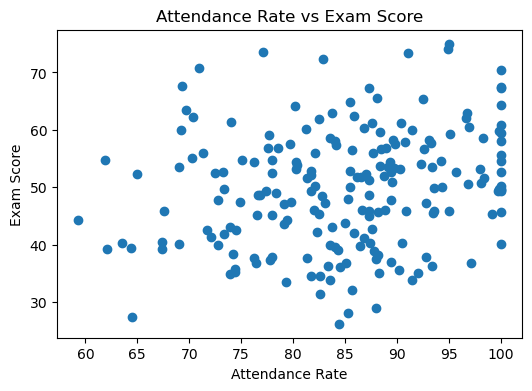

In [4]:
plt.figure(figsize=(6, 4))
plt.title('Attendance Rate vs Exam Score')
plt.scatter(df['Attendance_Rate'], df['Exam_Score'])
plt.xlabel('Attendance Rate')
plt.ylabel('Exam Score')
plt.show

Let's do the same for **Hours Studied** and **Exam Score**.

<function matplotlib.pyplot.show(close=None, block=None)>

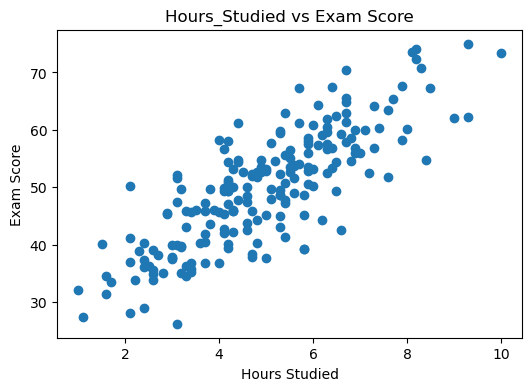

In [5]:
plt.figure(figsize=(6, 4))
plt.title('Hours_Studied vs Exam Score')
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show

In [6]:
df.corr()  # # Calculating the correlation between features

,Hours_Studied,Attendance_Rate,Exam_Score
Hours_Studied,1.000000,-0.087375,0.814611
Attendance_Rate,-0.087375,1.000000,0.217725
Exam_Score,0.814611,0.217725,1.000000


In [7]:
pr(df['Hours_Studied'], df['Exam_Score'])  # Returns correlation coefficient and p-value

PearsonRResult(statistic=0.8146114441941504, pvalue=1.001854612504006e-48)

In [ ]:
pr(df['Hours_Studied'], df['Exam_Score'])[0] # correlation coefficient

0.8146114441941504

In [ ]:
pr(df['Hours_Studied'], df['Exam_Score'])[1] # p-value

1.001854612504006e-48

In [10]:
pr(df['Attendance_Rate'], df['Exam_Score'])

PearsonRResult(statistic=0.2177250619350894, pvalue=0.001954654978569046)

### Fit a Linear Regression model

In [11]:
# instantiate the linear model
lr_model = LinearRegression()

In [14]:
# So let's sort the issue; We can use X as this
# X = df[['Hours_Studied']] # or
X = df['Hours_Studied'].values.reshape(-1, 1)
y = df['Exam_Score']

In [15]:
lr_model.fit(X, y) # We just trained the model

LinearRegression()

In [16]:
lr_model.predict([[14]])

array([92.53419151])

In [17]:
# this is based on the linear eqn y = mx + c
m = lr_model.coef_[0]
m

4.715386649773355

In [18]:
c = lr_model.intercept_
c

26.518778416744066

In [19]:
df.head(12)

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4
5,2.4,84.5,36.0
6,5.3,76.6,48.7
7,4.4,72.8,47.8
8,5.0,76.2,37.7
9,3.3,81.7,34.5


In [20]:
# Making predictions using the trained linear regression model
y_pred = lr_model.predict(X)
y_pred

array([52.92494366, 40.1933997 , 57.16879164, 59.0549463 , 31.70570373,
       37.83570638, 51.51032766, 47.26647968, 50.09571167, 42.07955436,
       58.58340764, 57.64033031, 50.56725033, 60.94110096, 54.33955965,
       42.07955436, 53.39648232, 41.13647703, 58.58340764, 49.624173  ,
       48.20955701, 43.49417036, 61.41263963, 48.68109567, 45.85186368,
       46.79494101, 55.28263698, 53.39648232, 53.86802099, 54.33955965,
       70.37187426, 46.32340235, 45.38032502, 42.55109303, 55.75417565,
       60.94110096, 49.15263434, 42.07955436, 42.55109303, 56.22571431,
       57.16879164, 55.28263698, 43.96570902, 52.45340499, 51.038789  ,
       51.98186633, 58.11186897, 51.98186633, 56.69725298, 50.56725033,
       52.92494366, 56.22571431, 36.42109038, 47.26647968, 45.85186368,
       43.96570902, 47.26647968, 64.24187161, 42.07955436, 59.0549463 ,
       34.06339706, 46.79494101, 51.51032766, 55.75417565, 56.69725298,
       57.64033031, 46.79494101, 45.85186368, 58.11186897, 48.20

Let's visualize the original data points alongside the line of best fit from the linear regression model.

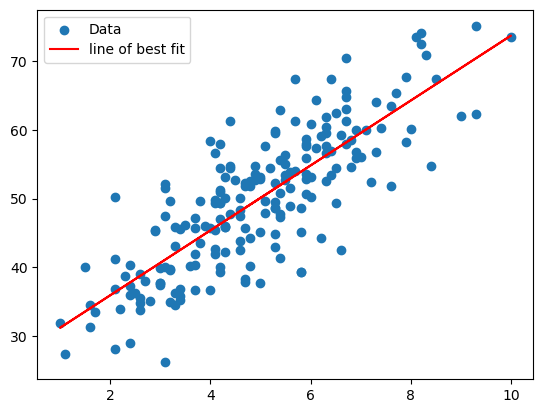

In [21]:
plt.scatter(X, y, label= 'Data')
plt.plot(X, y_pred, label= 'line of best fit', color= 'red')
plt.legend()
plt.show()

### Train Test split
Before trainig the model, let's first split the data into training and testing partitions

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metrics to evaluate regression models
from sklearn.model_selection import train_test_split  # Function to split dataset into training and testing sets

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # Features and target
    test_size=0.2,        # 20% of data for testing
    random_state=42       # Ensures reproducible splits
)

In [24]:
# Let's fit and train our model with the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# predict on both the train and test data

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [26]:
X_train

array([[ 4.4],
       [ 4.2],
       [ 3.4],
       [ 4.1],
       [ 5.4],
       [ 3.2],
       [ 5.9],
       [ 4.9],
       [ 5.5],
       [ 4.1],
       [ 5.1],
       [ 2.5],
       [ 2.4],
       [ 7.9],
       [ 5. ],
       [ 6. ],
       [ 5.8],
       [ 5.8],
       [ 4.1],
       [ 2.4],
       [ 4.9],
       [ 3. ],
       [ 4.2],
       [ 5.1],
       [ 7.3],
       [ 4.5],
       [ 3.7],
       [ 8.3],
       [ 6.3],
       [ 5.6],
       [ 6.3],
       [ 2.6],
       [ 9.3],
       [ 6.1],
       [ 8.2],
       [ 2.1],
       [ 6.1],
       [10. ],
       [ 4.2],
       [ 5.5],
       [ 6.5],
       [ 5.3],
       [ 6.7],
       [ 2.6],
       [ 4.6],
       [ 6. ],
       [ 3.5],
       [ 4.8],
       [ 8.4],
       [ 4.3],
       [ 7.4],
       [ 3. ],
       [ 7.6],
       [ 3.4],
       [ 6.6],
       [ 2.8],
       [ 2.6],
       [ 5.3],
       [ 5.7],
       [ 3. ],
       [ 1.1],
       [ 4. ],
       [ 1. ],
       [ 4.2],
       [ 1.5],
       [ 3.4],
       [ 6

In [27]:
# Displaying predicted values for the training set
y_train_pred  # Predicted target values for X_train

array([47.25687664, 46.32926212, 42.61880407, 45.86545487, 51.89494921,
       41.69118955, 54.2139855 , 49.57591292, 52.35875647, 45.86545487,
       50.50352744, 38.44453875, 37.9807315 , 63.49013064, 50.03972018,
       54.67779275, 53.75017824, 53.75017824, 45.86545487, 37.9807315 ,
       49.57591292, 40.76357504, 46.32926212, 50.50352744, 60.70728709,
       47.7206839 , 44.01022584, 65.34535967, 56.06921452, 52.82256372,
       56.06921452, 38.90834601, 69.98343224, 55.14160001, 64.88155241,
       36.58930973, 55.14160001, 73.23008304, 46.32926212, 52.35875647,
       56.99682904, 51.43114195, 57.92444355, 38.90834601, 48.18449115,
       54.67779275, 43.08261133, 49.11210567, 65.80916692, 46.79306938,
       61.17109435, 40.76357504, 62.09870887, 42.61880407, 57.46063629,
       39.83596053, 38.90834601, 51.43114195, 53.28637098, 40.76357504,
       31.95123716, 45.40164761, 31.4874299 , 46.32926212, 33.80646618,
       42.61880407, 58.38825081, 51.43114195, 44.4740331 , 44.47

In [28]:
X_test

array([[2.1],
       [3.3],
       [9.3],
       [4. ],
       [3.7],
       [3.9],
       [4.6],
       [3.7],
       [2.4],
       [5.4],
       [4.3],
       [4.2],
       [3.2],
       [6.3],
       [5.4],
       [5.3],
       [4.4],
       [1.7],
       [4.3],
       [6.7],
       [6.7],
       [5.7],
       [7.1],
       [4.8],
       [6.6],
       [1.6],
       [2.6],
       [4.1],
       [5.7],
       [6.3],
       [3.3],
       [6.8],
       [3.7],
       [6.4],
       [4.7],
       [3.1],
       [3. ],
       [6.7],
       [6.7],
       [4.1]])

In [29]:
# Displaying predicted values for the test set
y_test_pred  # Predicted target values for X_test

array([36.58930973, 42.15499681, 69.98343224, 45.40164761, 44.01022584,
       44.93784035, 48.18449115, 44.01022584, 37.9807315 , 51.89494921,
       46.79306938, 46.32926212, 41.69118955, 56.06921452, 51.89494921,
       51.43114195, 47.25687664, 34.7340807 , 46.79306938, 57.92444355,
       57.92444355, 53.28637098, 59.77967258, 49.11210567, 57.46063629,
       34.27027344, 38.90834601, 45.86545487, 53.28637098, 56.06921452,
       42.15499681, 58.38825081, 44.01022584, 56.53302178, 48.64829841,
       41.2273823 , 40.76357504, 57.92444355, 57.92444355, 45.86545487])

Let's evaluate the model by computing key regression performance metrics for the set of the true and predicted values:

In [30]:
# Function to evaluate regression model performance
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)               # Coefficient of determination
    mae = mean_absolute_error(y_true, y_pred)   # Average absolute error
    mse = mean_squared_error(y_true, y_pred)    # Average squared error
    rmse = np.sqrt(mse)                          # Root mean squared error
    
    # Print all evaluation metrics
    print('r2:', r2)
    print('mae:', mae)
    print('mse:', mse)
    print('rmse:', rmse)


In [31]:
# Evaluate the model on the training data

evaluate_model(y_train, y_train_pred)

r2: 0.6593179866868724
mae: 4.646334477112401
mse: 34.20235219339493
rmse: 5.848277711719488


In [32]:
# Evaluate the model on the test data

evaluate_model(y_test, y_test_pred)

r2: 0.6752906629968907
mae: 4.704394453850044
mse: 35.110396458574755
rmse: 5.92540264105105


### Residual Analysis

Residual analysis is an important step in regression modeling used to **evaluate the goodness of fit** of a regression model.  

A **residual** is the difference between the **observed value** and the **predicted value** from the regression model:

In [33]:
# Calculating residuals for the training set
train_residuals = y_train - y_train_pred

train_residuals

79     13.943123
197     4.970738
38     -6.818804
24     -3.865455
122    11.005051
         ...    
106    10.872618
14     -1.413985
92      2.970738
179     0.977436
102    -0.893069
Name: Exam_Score, Length: 160, dtype: float64

In [34]:
# for the test set
test_residuals = y_test - y_test_pred

test_residuals

95      4.610690
15      3.745003
30     -7.683432
158    -8.701648
128    -2.110226
115     1.062160
69     -4.384491
170    -7.310226
174     2.319269
45    -10.494949
66     -0.793069
182    -6.229262
165     7.908810
78      4.330785
186    -4.094949
177     0.868858
56      7.143123
152    -1.234081
82      3.306931
68      6.875556
124    12.475556
16      7.913629
148     0.120327
93     -4.812106
65      1.739364
60      0.229727
84     -4.008346
67     10.734545
125     0.713629
132    -3.569215
9      -7.654997
18      0.111749
55      3.189774
75      0.366978
150     3.251702
104   -15.027382
135    -0.863575
137     7.675556
164     5.075556
76      3.434545
Name: Exam_Score, dtype: float64

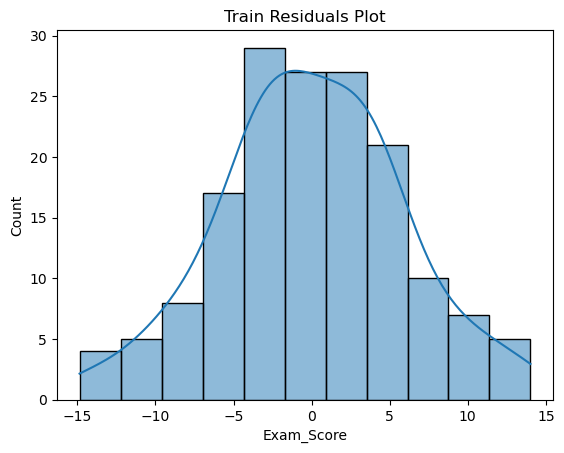

In [41]:
# Plotting for the distrution of the train data residuals

sns.histplot(train_residuals, kde= True)
plt.title('Train Residuals Plot')
plt.show()

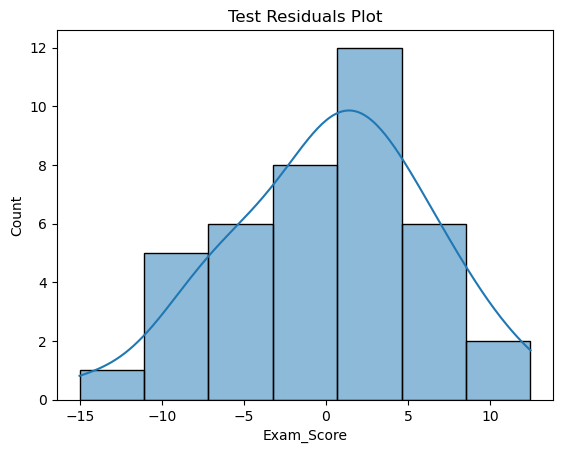

In [40]:
# Plotting for the distrution of the test data residuals

sns.histplot(test_residuals, kde= True)
plt.title('Test Residuals Plot')
plt.show()

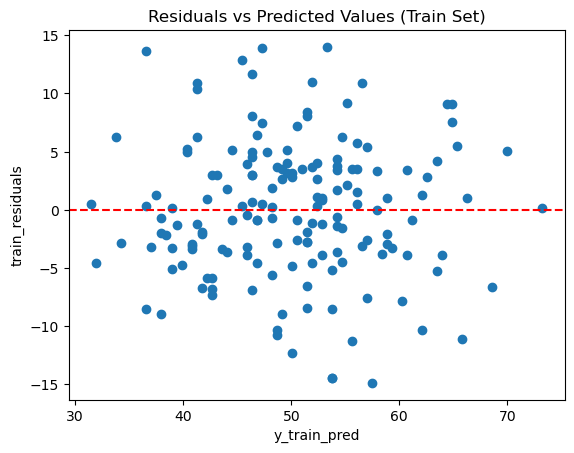

In [42]:
# Checking for biasness for train data (homoscedasticity or heteroscedasticity)

plt.scatter(y_train_pred, train_residuals)
plt.title('Residuals vs Predicted Values (Train Set)')
plt.xlabel('y_train_pred')
plt.ylabel('train_residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

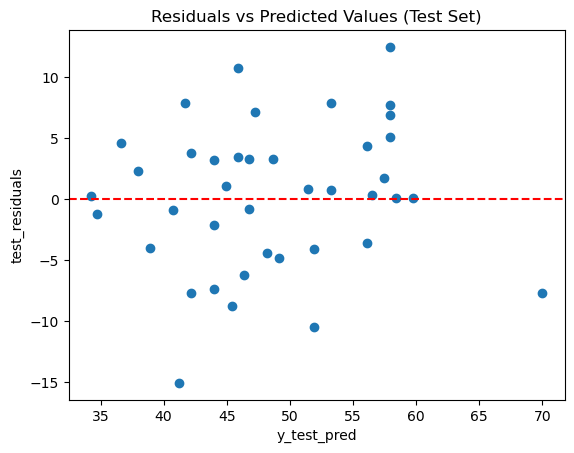

In [43]:
# Checking for biasness for test data (homoscedasticity or heteroscedasticity)

plt.scatter(y_test_pred, test_residuals)
plt.title('Residuals vs Predicted Values (Test Set)')
plt.xlabel('y_test_pred')
plt.ylabel('test_residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Our model shows no bias (Homoscedasticity)